## BigMart Sales
###Project Description:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. 

### Problem statement: 
The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales. The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

### Dataset Description:

Variable - Description

Item_Identifier- Unique product ID

Item_Weight- Weight of product

Item_Fat_Content - Whether the product is low fat or not

Item_Visibility - The % of total display area of all products in a store allocated to the particular product

Item_Type - The category to which the product belongs

Item_MRP - Maximum Retail Price (list price) of the product

Outlet_Identifier - Unique store ID

Outlet_Establishment_Year- The year in which store was established

Outlet_Size - The size of the store in terms of ground area covered

Outlet_Location_Type- The type of city in which the store is located

Outlet_Type- Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales - Sales of the product in the particulat store. This is the outcome variable to be predicted.

##Import csv 

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/mariasihotang/technocolabs_project/main/Train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


## EDA

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

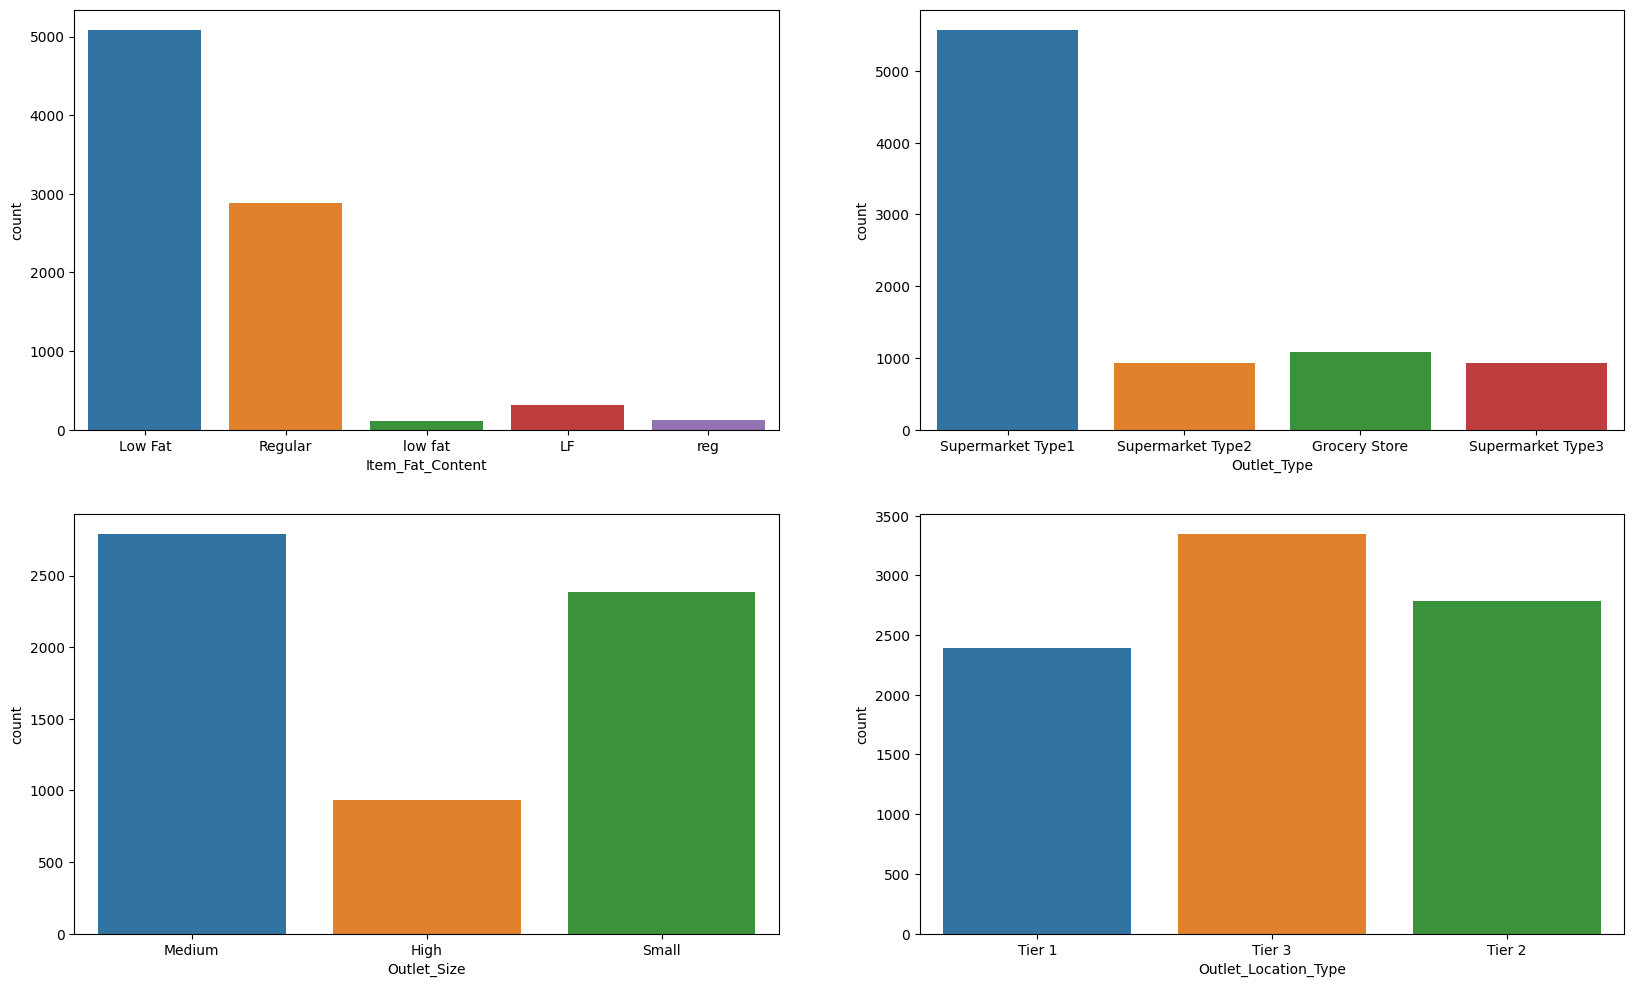

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axarr = plt.subplots(2,2, figsize=(20,12))
sns.countplot(x='Item_Fat_Content', data=df, ax=axarr[0][0])
sns.countplot(x='Outlet_Type', data=df, ax=axarr[0][1])
sns.countplot(x='Outlet_Size', data=df, ax=axarr[1][0])
sns.countplot(x='Outlet_Location_Type', data=df, ax=axarr[1][1])

Text(0.5, 1.0, 'Item Outlet Sales')

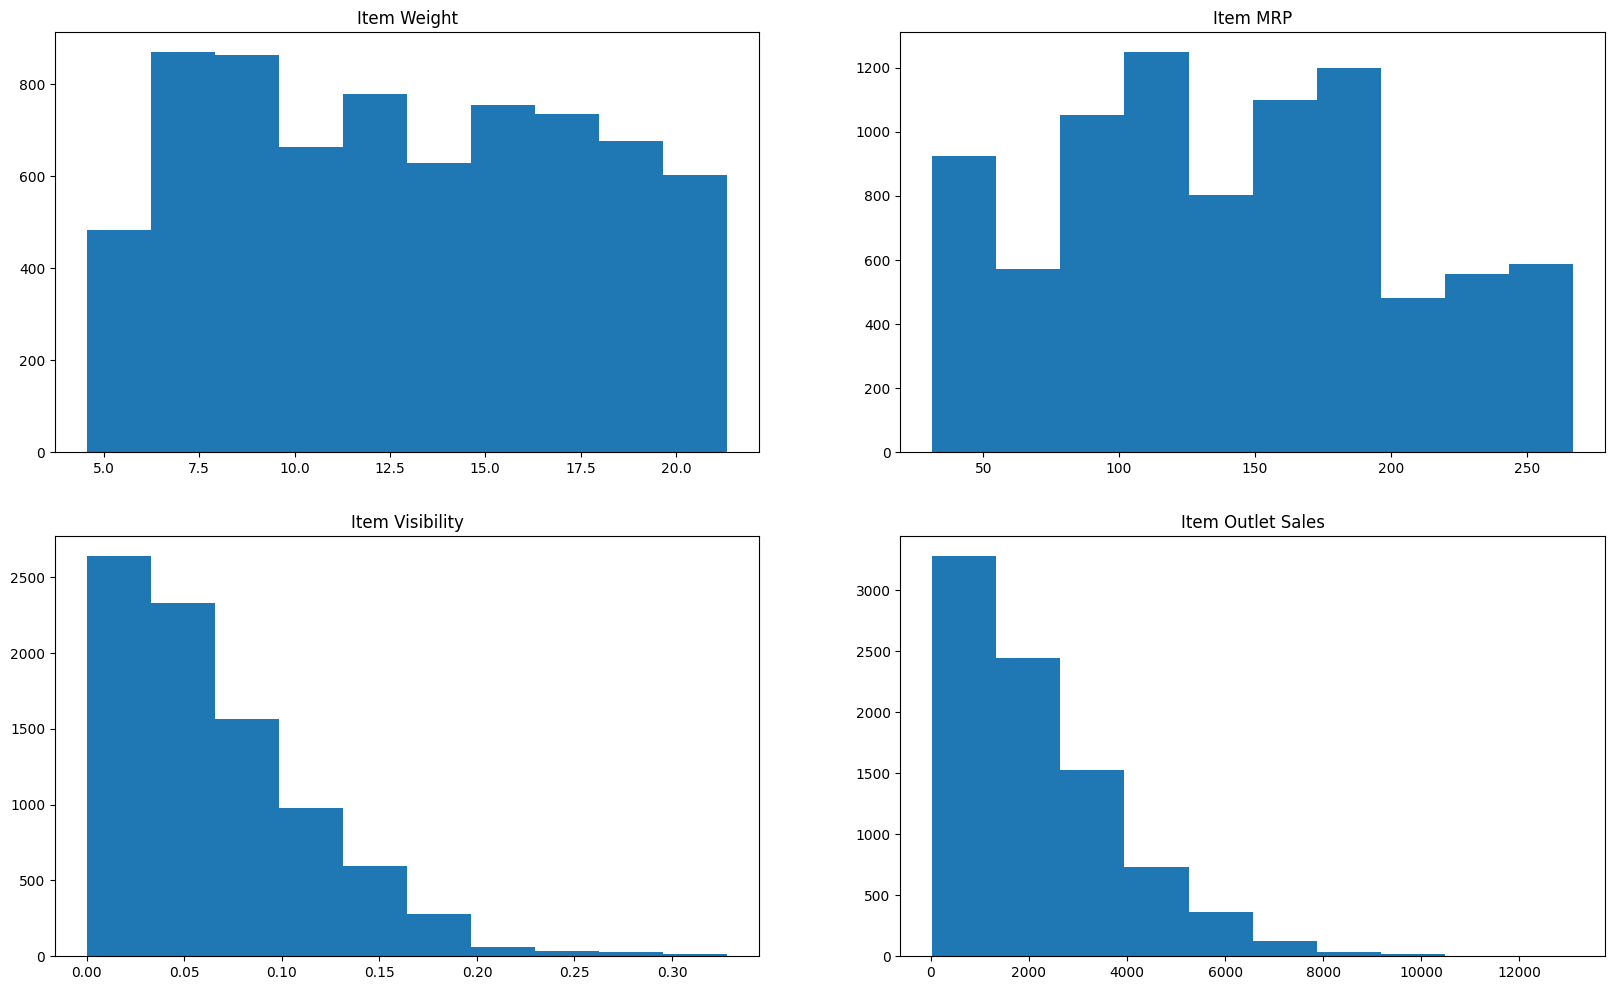

In [ ]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.hist(df['Item_Weight'])
plt.title('Item Weight')

plt.subplot(2,2,2)
plt.hist(df['Item_MRP'])
plt.title('Item MRP')

plt.subplot(2,2,3)
plt.hist(df['Item_Visibility'])
plt.title('Item Visibility')

plt.subplot(2,2,4)
plt.hist(df['Item_Outlet_Sales'])
plt.title('Item Outlet Sales')

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

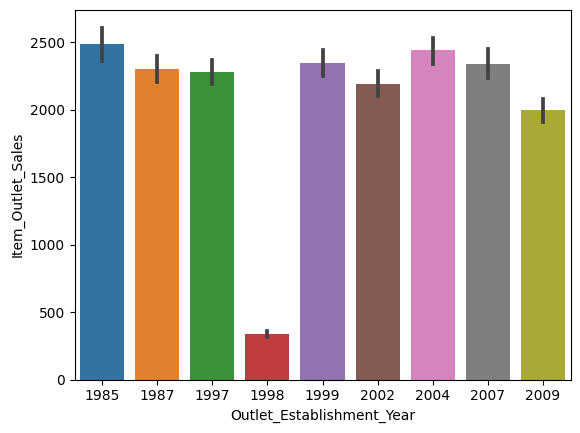

In [ ]:
sns.barplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=df)

<Axes: xlabel='Item_Type', ylabel='count'>

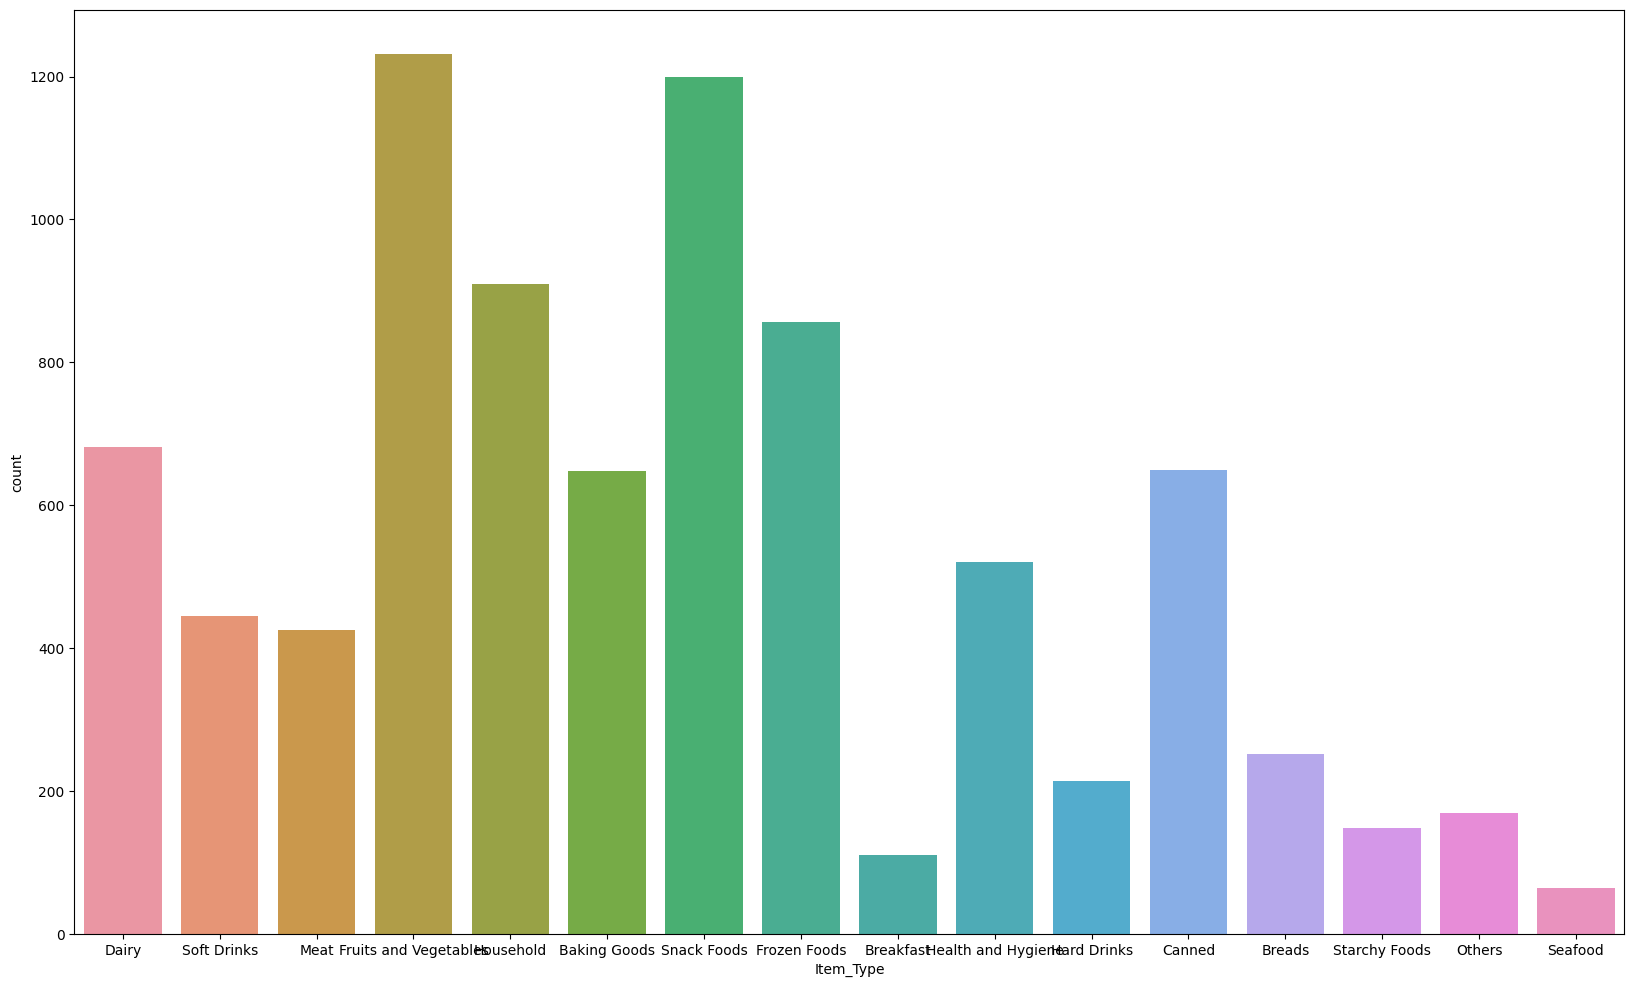

In [ ]:
plt.figure(figsize=(20,12))
sns.countplot(x='Item_Type', data=df)

Based on the visualization above:
- For the item_type, the 3 most purchase item are Fruit & Vegetables, Snack Foods, and Household
- For the outlet_establishment_year, there was a decrease drastically in outlet in 1998 and then increased in the 1999
- For item_fat_content, people prefer low fat over regular for preference
- For outlets, there are many supermarket type 1 with medium size outlets, and location type tier 3


## Data preprocessing

In [ ]:
# check missing value
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# find out the percentage of missing value in each column
df.isna().mean() * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [ ]:
# fill missing values
df['Item_Weight'].fillna(value = df['Item_Weight'].mean(), inplace = True)
df['Outlet_Size'].fillna(value = df['Outlet_Size'].mode()[0], inplace = True)

In [ ]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
# check duplicate value
df[df.duplicated()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
# replace 'LF', 'low fat' into 'Low Fat' and 'reg' into 'Regular'
df.replace(['low fat','LF'],'Low Fat', inplace=True)
df.replace('reg','Regular', inplace=True)

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
# drop product id and outlet id columns
df.drop(columns=['Item_Identifier', 'Outlet_Identifier'],inplace=True)

## Feature engineering

In [ ]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.replace({'Outlet_Size':{'Low':0, 'Medium':1, 'High':2}}, inplace=True)
df.replace({'Outlet_Location_Type':{'Tier 1':0, 'Tier 2':1, 'Tier 3':2}}, inplace=True)
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,1,0,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,1,2,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,1,0,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,1,2,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,2,2,Supermarket Type1,994.7052


In [ ]:
df = pd.get_dummies(df)
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_1,Outlet_Size_2,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,0,3735.1380,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,2,443.4228,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
2,17.50,0.016760,141.6180,1999,0,2097.2700,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,2,732.3800,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.93,0.000000,53.8614,1987,2,994.7052,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
df['results'] = pd.qcut(df['Item_Outlet_Sales'], q=4, labels=['Bronze','Silver','Gold','Platinum'])
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_1,Outlet_Size_2,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,results
0,9.30,0.016047,249.8092,1999,0,3735.1380,1,0,0,0,...,0,0,1,0,0,0,1,0,0,Platinum
1,5.92,0.019278,48.2692,2009,2,443.4228,0,1,0,0,...,1,0,1,0,0,0,0,1,0,Bronze
2,17.50,0.016760,141.6180,1999,0,2097.2700,1,0,0,0,...,0,0,1,0,0,0,1,0,0,Gold
3,19.20,0.000000,182.0950,1998,2,732.3800,0,1,0,0,...,0,0,1,0,0,1,0,0,0,Bronze
4,8.93,0.000000,53.8614,1987,2,994.7052,1,0,0,0,...,0,0,0,1,0,0,1,0,0,Silver


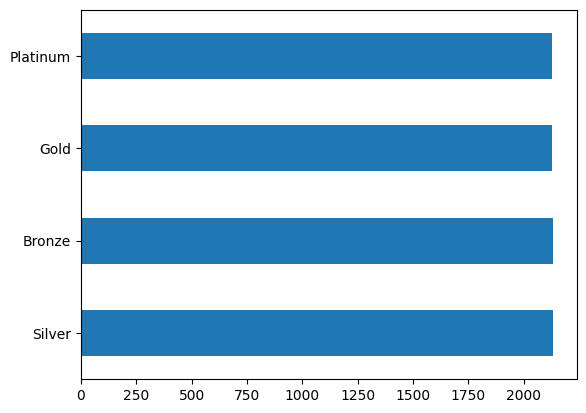

In [ ]:
df['results'].value_counts().plot(kind='barh')
plt.show()

In [ ]:
df['results'].value_counts()

Silver      2134
Bronze      2131
Gold        2130
Platinum    2128
Name: results, dtype: int64

In [ ]:
df.replace({'results':{'Bronze':0, 'Silver':1, 'Gold':2, 'Platinum':3}}, inplace=True)
df.head(10)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_1,Outlet_Size_2,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,results
0,9.300000,0.016047,249.8092,1999,0,3735.1380,1,0,0,0,...,0,0,1,0,0,0,1,0,0,3
1,5.920000,0.019278,48.2692,2009,2,443.4228,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
2,17.500000,0.016760,141.6180,1999,0,2097.2700,1,0,0,0,...,0,0,1,0,0,0,1,0,0,2
3,19.200000,0.000000,182.0950,1998,2,732.3800,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
4,8.930000,0.000000,53.8614,1987,2,994.7052,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
5,10.395000,0.000000,51.4008,2009,2,556.6088,0,1,1,0,...,0,0,1,0,0,0,0,1,0,0
6,13.650000,0.012741,57.6588,1987,2,343.5528,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
7,12.857645,0.127470,107.7622,1985,2,4022.7636,1,0,0,0,...,0,0,1,0,0,0,0,0,1,3
8,16.200000,0.016687,96.9726,2002,1,1076.5986,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
9,19.200000,0.094450,187.8214,2007,1,4710.5350,0,1,0,0,...,0,0,1,0,0,0,1,0,0,3


## Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = scaler.transform(df)

## Split train test

In [ ]:
x = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

In [ ]:
x.shape, y.shape

((8523, 31), (8523,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6818, 31), (1705, 31), (6818,), (1705,))

## Modeling

### Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
     
linreg = LinearRegression()
linreg.fit(x_train, y_train)
linreg_pred = linreg.predict(x_test)

In [ ]:
linreg_mae = mean_absolute_error(y_test, linreg_pred)
linreg_r2 = r2_score(y_test, linreg_pred)
print("MAE of linear regression model is: ", linreg_mae)
print("R2 Score of linear regression model is: ", linreg_r2)

MAE of linear regression model is:  481.5872313644681
R2 Score of linear regression model is:  0.8199267244934958


In [ ]:
linreg_score = cross_val_score(linreg, x_test, y_test, cv=4)
print("Linear regression accuracy is:", linreg_score.mean()*100)

Linear regression accuracy is: 81.54022033563277


### Random forest

In [ ]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)
rf_reg_pred = rf_reg.predict(x_test)

In [ ]:
rf_reg_mae = mean_absolute_error(y_test, rf_reg_pred)
rf_reg_r2 = r2_score(y_test, rf_reg_pred)
print("MAE of random forest regressor model is: ", rf_reg_mae)
print("R2 Score of random forest regressor model is: ", rf_reg_r2)

MAE of random forest regressor model is:  388.3432356422287
R2 Score of random forest regressor model is:  0.8470902673080034


In [ ]:
rf_score = cross_val_score(rf_reg, x_test, y_test, cv=4)
print("Random forest model accuracy is:", rf_score.mean()*100)

Random forest model accuracy is: 85.36390344407297


In [ ]:
# Predicting the charges
y_pred = rf_reg.predict(x_test)
# Comparing the actual output values with the predicted values
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data.head(10)

,Actual,Predicted
7503,1743.0644,1286.824950
2957,356.8688,612.176468
7031,377.5086,467.065358
1084,5778.4782,4814.679436
856,2356.9320,2518.082232
4304,865.5400,1071.997922
2132,4613.9940,5775.269044
1385,2410.8618,2320.652558
5239,1948.1308,2121.525094
6516,1937.4780,2488.467448


## Summary:
Based on the dataset, we can conclude:
- The top 3 most purchases are fruit & vegetables, snack food, and household. 
- Most of customer also prefer the low fat food over regular food as a preference.
- There was a decrease drastically in outlet in 1998 and then increased in the 1999
- There are many supermarket type 1 with medium size outlets, and location type tier 3
- For the item sales, we need to do price category for each product which are bronze, silver, gold, and platinum. So that it would be easier to predict the sales of each product by using machine learning model random forest.
